Database and APIs: accessing materials data online

* Machine-learning benefits from large quantities of data for training and testing

* Materials data is now available online through websites and programmatically accessible APIs

* Available data includes both experimental (relatively scarce and often requiring license fees) and computational data (relatively plentiful and freely available)

* Computational materials databases include aflow.org, materialsproject.org, nomad-lab.eu, oqmd.org and materialscloud.org

* Databases can be accessed programmatically using REST-APIs

REST-API: Representational State Transfer Application Programming Interface


* In response to a client request, the API transfers a representation of the current state (e.g. current version of a section of a database) to the client

* Commonly used methods: GET (retrieve data from server), POST (post data to server)

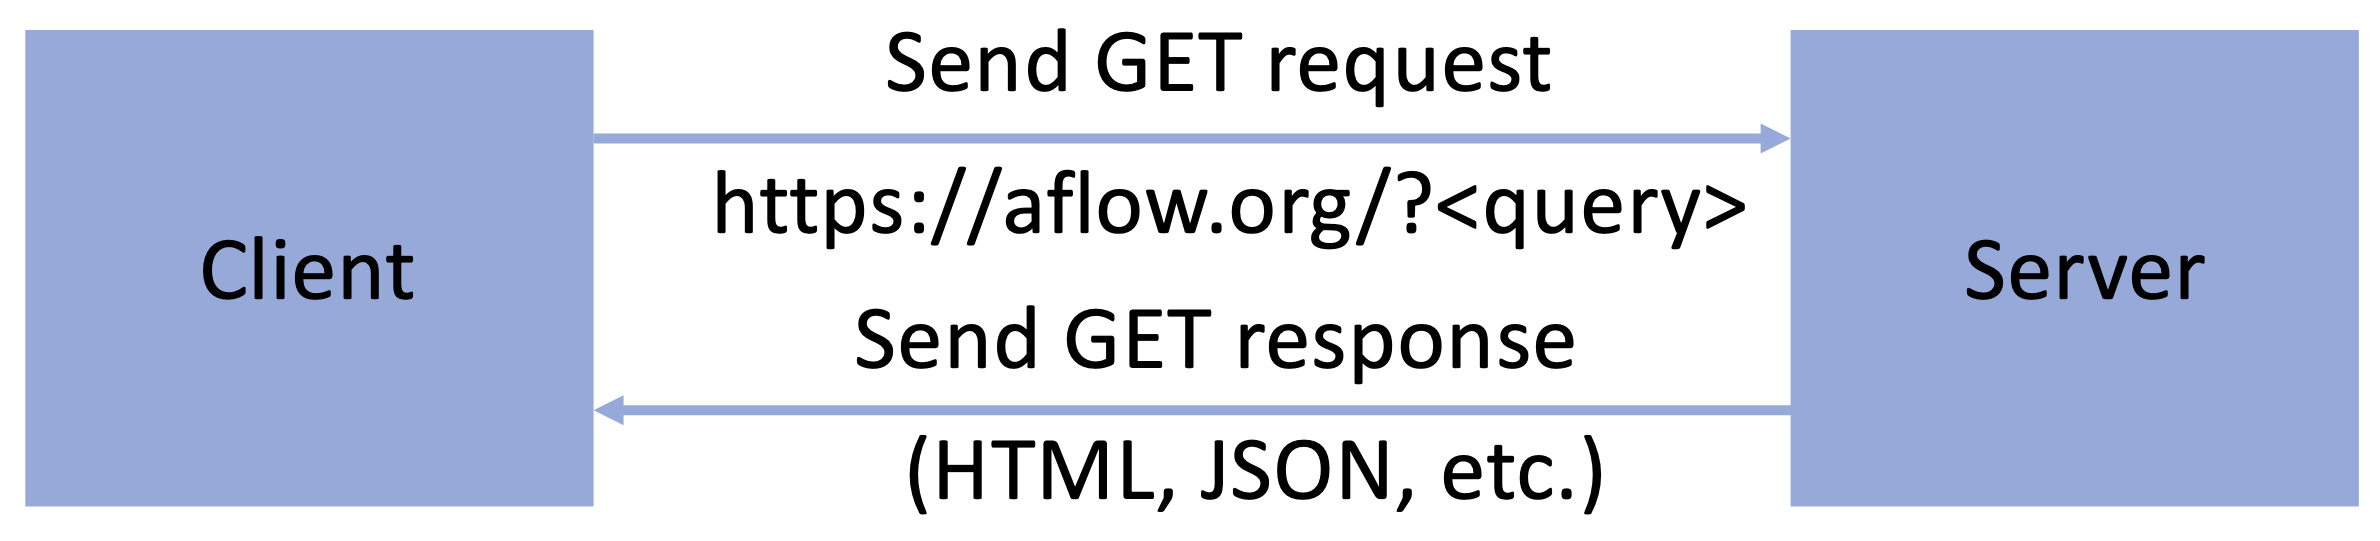

GET request is submitted in the form of a URI (Uniform Resource Identifier)

* URI has the following format:

\<scheme\>://\<authority>/\<path>?\<query>#\<fragment>

AFLUX Search API can be used to programmatically retrieve data from the AFLOW database.

* AFLUX URI has the format: https://aflow.org/API/aflux/?<matchbook\>,\<directives>

* Matchbook: materials keywords with arguments

* Directives: formatting instructions with arguments

* AFLUX supports several logical operators; operator scope can be inter-property and/or intra-property

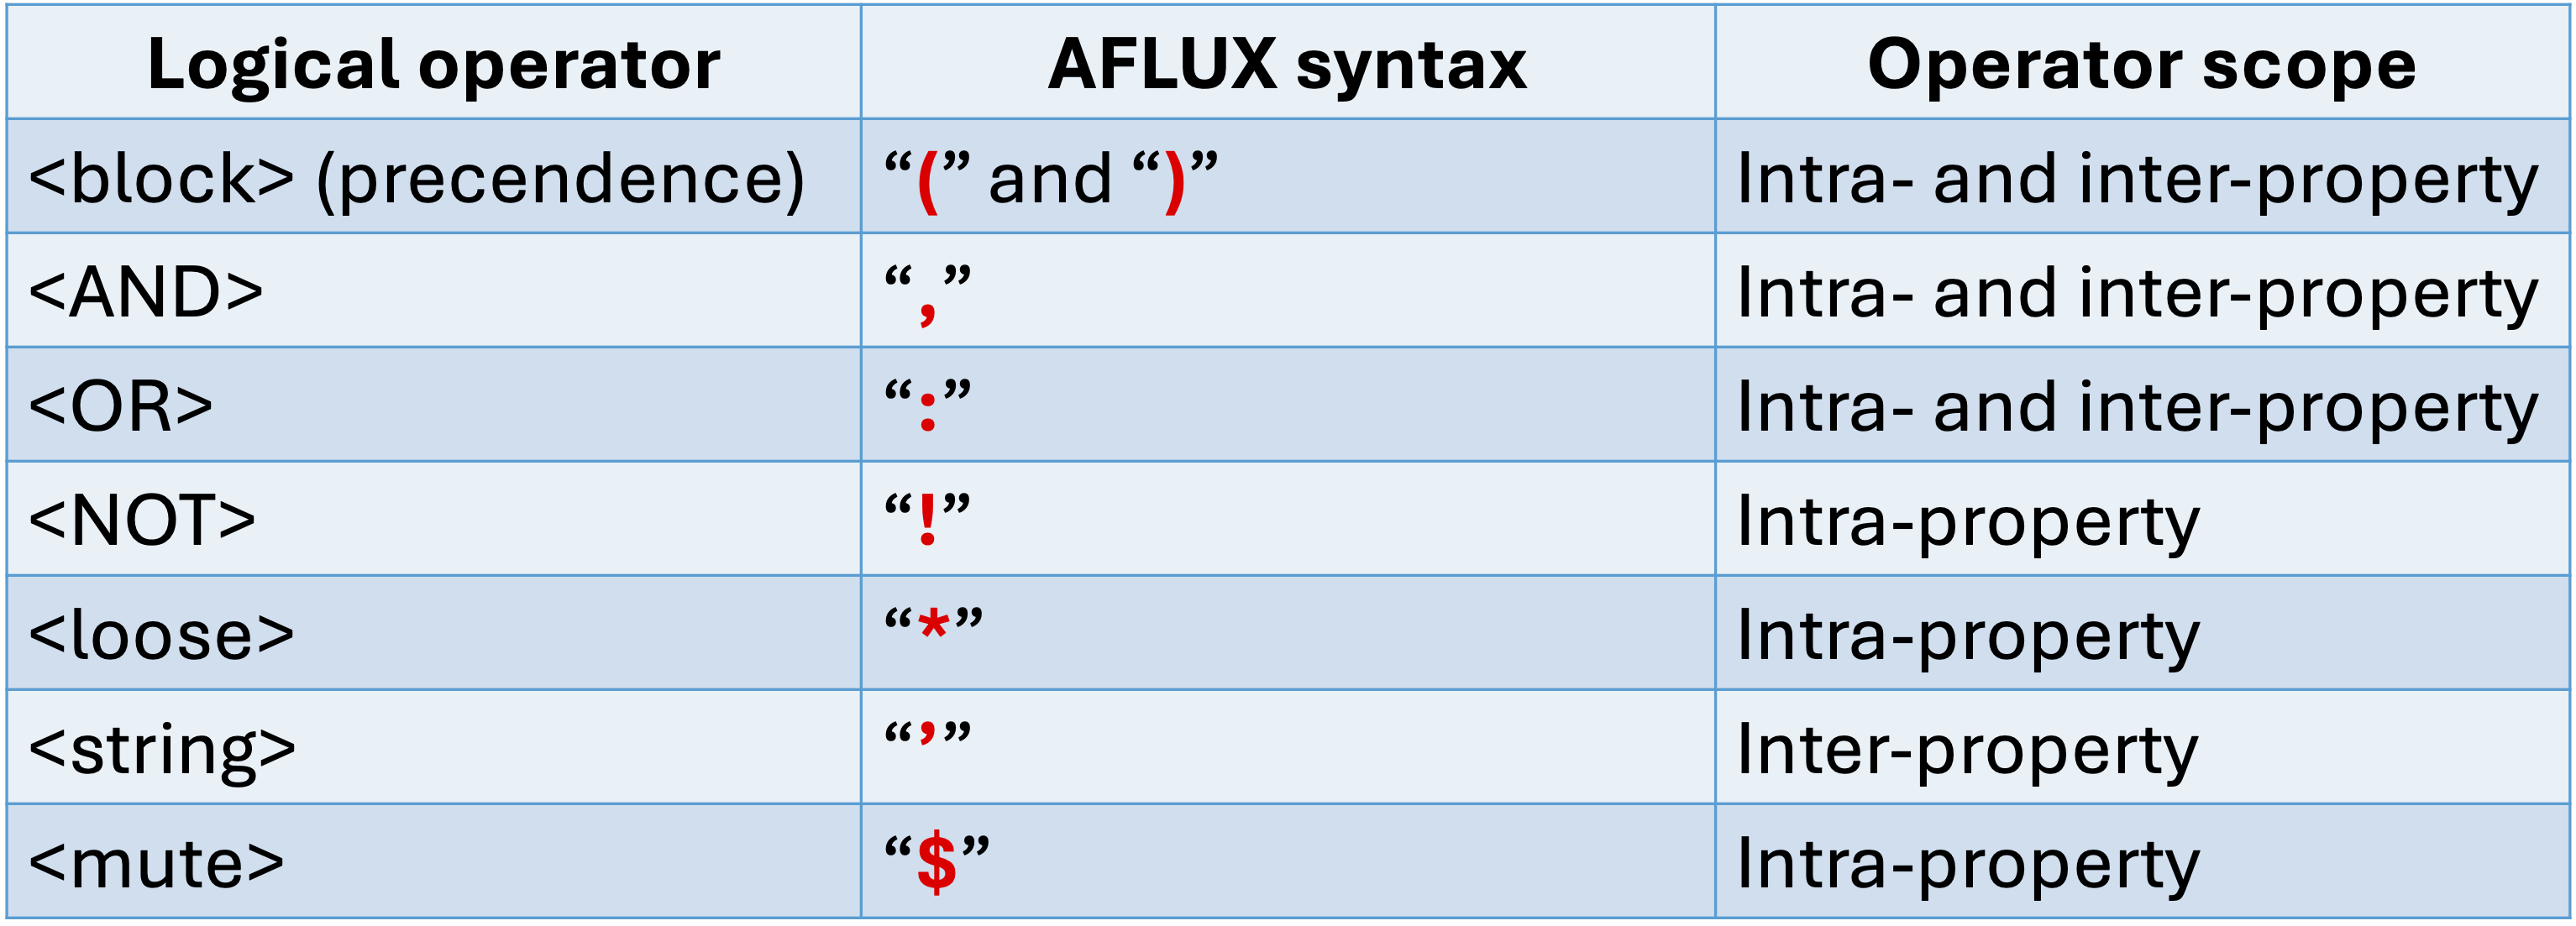


Common AFLUX keywords:

* species: chemical species (usually element symbols)
* nspecies: number of different species in compound
* Egap: electronic band gap
* spacegroup_relax: Space group of relaxed structure
* aflow_prototype_label_relax: AFLOW prototype label (structure type) of relaxed structure


Programmatically searching for data using AFLUX API: search for NaCl or KCl with an electronic band gap greater than 5eV

* Matchbook: species((Na:K),Cl),nspecies(2),Egap(5*)

* Directives (return all entries and mute paging information): $paging(0)

In [ ]:
import json, sys, os
from urllib.request import urlopen

SERVER="https://aflow.org"
API="/API/aflux/?"
MATCHBOOK="species((Na:K),Cl),nspecies(2),Egap(5*)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

print(SERVER+API+SUMMONS)

response=json.loads(urlopen(SERVER+API+SUMMONS).read().decode("utf-8"))
print(response)

https://aflow.org/API/aflux/?species((Na:K),Cl),nspecies(2),Egap(5*),$paging(0)
[{'compound': 'Cl1K1', 'auid': 'aflow:04b2e3ac1bd9b49b', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1K1_ICSD_240523', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'K'], 'nspecies': 2, 'Egap': 5.0427}, {'compound': 'Cl1K1', 'auid': 'aflow:10ecfa7c5168b66a', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1K1_ICSD_240515', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'K'], 'nspecies': 2, 'Egap': 5.0482}, {'compound': 'Cl1K1', 'auid': 'aflow:128b9accb20279b5', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1K1_ICSD_240527', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'K'], 'nspecies': 2, 'Egap': 5.0422}, {'compound': 'Cl1K1', 'auid': 'aflow:165ce9613a0efc6f', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1K1_ICSD_53841', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'K'], 

Parse JSON response: print chemical formula and electronic band gap

In [ ]:
import json, sys, os
from urllib.request import urlopen

SERVER="https://aflow.org"
API="/API/aflux/?"
MATCHBOOK="species((Na:K),Cl),nspecies(2),Egap(5*)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(SERVER+API+SUMMONS).read().decode("utf-8"))
for datum in response:
    bandgap=[float(datum['Egap'])]
    compound=[str(x) for x in datum['compound'].split(",")]
    print ("{}, {}".format(compound, bandgap))

['Cl1K1'], [5.0427]
['Cl1K1'], [5.0482]
['Cl1K1'], [5.0422]
['Cl1K1'], [5.0553]
['Cl1K1'], [5.0545]
['Cl1K1'], [5.0487]
['Cl1K1'], [5.0534]
['Cl1K1'], [5.0547]
['Cl1K1'], [5.0529]
['Cl1K1'], [5.0439]
['Cl1K1'], [5.0533]
['Cl1K1'], [5.0365]
['Cl1K1'], [5.0387]
['Cl1K1'], [5.0325]
['Cl1K1'], [5.0395]
['Cl1K1'], [5.0321]
['Cl1K1'], [5.0574]
['Cl1K1'], [5.0396]
['Cl1K1'], [5.0588]
['Cl1K1'], [5.039]
['Cl1K1'], [5.0406]
['Cl1K1'], [5.0385]
['Cl1K1'], [5.0423]
['Cl1K1'], [5.0526]
['Cl1K1'], [5.0486]
['Cl1K1'], [5.0543]
['Cl1K1'], [5.0398]
['Cl1K1'], [5.0547]
['Cl1K1'], [5.054]
['Cl1K1'], [5.0322]
['Cl1K1'], [5.0385]
['Cl1K1'], [5.0486]
['Cl1K1'], [5.0423]
['Cl1K1'], [5.0538]
['Cl1K1'], [5.0327]
['Cl1K1'], [5.0418]
['Cl1K1'], [5.0392]
['Cl1K1'], [5.0439]
['Cl1Na1'], [5.0564]
['Cl1Na1'], [5.0561]
['Cl1Na1'], [5.0564]
['Cl1Na1'], [5.0394]
['Cl1Na1'], [5.0506]
['Cl1Na1'], [5.0504]
['Cl1Na1'], [5.0544]
['Cl1Na1'], [5.0535]
['Cl1Na1'], [5.0476]
['Cl1Na1'], [5.0363]
['Cl1Na1'], [5.0498]
['Cl1Na1'],

Paging directive: control page number and number of entries per page: useful to limit amount of data returned at once to avoid overloading browser/computer

* “Page” is set of data returned at a time; “paging(0)” returns all data

* Paging takes two arguments: first is page number “n”, second is number of entries per page “m”: paging(n,m)

* Example: return first page with 10 entries per page: paging(1,10)

* Negative page number reverses sort order: paging



Paging: print first page of 10 entries per page

In [ ]:
import json, sys, os
from urllib.request import urlopen

SERVER="https://aflow.org"
API="/API/aflux/?"
MATCHBOOK="species((Na:K),Cl),nspecies(2),Egap(5*)"
DIRECTIVES="$paging(1,10)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(SERVER+API+SUMMONS).read().decode("utf-8"))
for datum in response:
    bandgap=[float(datum['Egap'])]
    compound=[str(x) for x in datum['compound'].split(",")]
    print ("{}, {}".format(compound, bandgap))

['Cl1K1'], [5.0427]
['Cl1K1'], [5.0482]
['Cl1K1'], [5.0422]
['Cl1K1'], [5.0553]
['Cl1K1'], [5.0545]
['Cl1K1'], [5.0487]
['Cl1K1'], [5.0534]
['Cl1K1'], [5.0547]
['Cl1K1'], [5.0529]
['Cl1K1'], [5.0439]


Search for materials containing C, Si, Ge or Sn but not Pb

In [ ]:
import json, sys, os
from urllib.request import urlopen

SERVER="https://aflow.org"
API="/API/aflux/?"
MATCHBOOK="species((C:Si:Ge:Sn),!Pb)"
DIRECTIVES="$paging(1,10)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

print(SERVER+API+SUMMONS)

response=json.loads(urlopen(SERVER+API+SUMMONS).read().decode("utf-8"))
print(response)

https://aflow.org/API/aflux/?species((C:Si:Ge:Sn),!Pb),$paging(1,10)
[{'compound': 'Ag1Al1Au1Sn1', 'auid': 'aflow:4389c382c27f3f50', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB4_RAW/AgAlAuSn:PAW_PBE/ABCD_cF16_216_c_d_b_a.ABCD', 'spacegroup_relax': 216, 'Pearson_symbol_relax': 'cF16', 'species': ['Ag', 'Al', 'Au', 'Sn']}, {'compound': 'Ag1Al1Au1Sn1', 'auid': 'aflow:7d3a5c148a5829a4', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB4_RAW/AgAlAuSn:PAW_PBE/ABCD_cF16_216_c_d_b_a.BCAD', 'spacegroup_relax': 216, 'Pearson_symbol_relax': 'cF16', 'species': ['Ag', 'Al', 'Au', 'Sn']}, {'compound': 'Ag1Al1Au1Sn1', 'auid': 'aflow:8691c6feed2a92ba', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB4_RAW/AgAlAuSn:PAW_PBE/ABCD_cF16_216_c_d_b_a.CABD', 'spacegroup_relax': 216, 'Pearson_symbol_relax': 'cF16', 'species': ['Ag', 'Al', 'Au', 'Sn']}, {'compound': 'Ag1Al1Ba1Sn1', 'auid': 'aflow:9e6dfd0dda0fe0a2', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB4_RAW/AgAlBa_svSn:PAW_PBE/ABCD_cF16_216_c_d_b_a.ABCD', 'spacegroup_relax': 21

Prototype label: \<composition>\_\<Pearson symbol>\_\<space group number>\_\<Wyckoff positions>

* Cubic perovskite: ABC3_cP5_221_a_b_c

Search for NaCl in rocksalt structure: prototype label is AB_cF8_225_a_b

In [ ]:
import json, sys, os
from urllib.request import urlopen

SERVER="https://aflow.org"
API="/API/aflux/?"
MATCHBOOK="species(Na,Cl),nspecies(2),aflow_prototype_label_relax(AB_cF8_225_a_b)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(SERVER+API+SUMMONS).read().decode("utf-8"))
print(response)

[{'compound': 'Cl1Na1', 'auid': 'aflow:39ab5e62afdb5ac0', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1Na1_ICSD_622369', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'Na'], 'nspecies': 2, 'aflow_prototype_label_relax': 'AB_cF8_225_a_b'}, {'compound': 'Cl1Na1', 'auid': 'aflow:4f19021768a3118a', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1Na1_ICSD_41411', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'Na'], 'nspecies': 2, 'aflow_prototype_label_relax': 'AB_cF8_225_a_b'}, {'compound': 'Cl1Na1', 'auid': 'aflow:9017f9c64ead22ab', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1Na1_ICSD_240603', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'Na'], 'nspecies': 2, 'aflow_prototype_label_relax': 'AB_cF8_225_a_b'}, {'compound': 'Cl1Na1', 'auid': 'aflow:a5755554aaf5d10e', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1Na1_ICSD_655785', 'spacegroup_relax': 225, 'Pearson_symbol_relax': '

Search for lead-free halide perovskites with band-gap greater than 3eV

In [ ]:
import json, sys, os
from urllib.request import urlopen

SERVER="https://aflow.org"
API="/API/aflux/?"
MATCHBOOK="species((F:Cl:Br:I),!Pb),nspecies(3),aflow_prototype_label_relax(ABC3_cP5_221_a_b_c),Egap(3*)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(SERVER+API+SUMMONS).read().decode("utf-8"))
print(response)

[{'compound': 'Ag1Be1F3', 'auid': 'aflow:aa197e3461543939', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgBe_svF/T0009.ABC:LDAU2', 'spacegroup_relax': 221, 'Pearson_symbol_relax': 'cP5', 'species': ['Ag', 'Be', 'F'], 'nspecies': 3, 'aflow_prototype_label_relax': 'ABC3_cP5_221_a_b_c', 'Egap': 3.8336}, {'compound': 'Ag1Be1F3', 'auid': 'aflow:aa197e3461543939', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgBe_svF/T0009.ABC:LDAU2', 'spacegroup_relax': 221, 'Pearson_symbol_relax': 'cP5', 'species': ['Ag', 'Be', 'F'], 'nspecies': 3, 'aflow_prototype_label_relax': 'ABC3_cP5_221_a_b_c', 'Egap': 3.8336}]


Search for lead-free halide perovskites with band-gap greater than 3eV: use "Halogens" variable to search for all Halogens

In [ ]:
import json, sys, os
from urllib.request import urlopen

SERVER="https://aflow.org"
API="/API/aflux/?"
MATCHBOOK="species(Halogens,!Pb),nspecies(3),aflow_prototype_label_relax(ABC3_cP5_221_a_b_c),Egap(3*)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(SERVER+API+SUMMONS).read().decode("utf-8"))
print(response)

[{'compound': 'Ag1Be1F3', 'auid': 'aflow:aa197e3461543939', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgBe_svF/T0009.ABC:LDAU2', 'spacegroup_relax': 221, 'Pearson_symbol_relax': 'cP5', 'species': ['Ag', 'Be', 'F'], 'nspecies': 3, 'aflow_prototype_label_relax': 'ABC3_cP5_221_a_b_c', 'Egap': 3.8336}, {'compound': 'Ag1Be1F3', 'auid': 'aflow:aa197e3461543939', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgBe_svF/T0009.ABC:LDAU2', 'spacegroup_relax': 221, 'Pearson_symbol_relax': 'cP5', 'species': ['Ag', 'Be', 'F'], 'nspecies': 3, 'aflow_prototype_label_relax': 'ABC3_cP5_221_a_b_c', 'Egap': 3.8336}]


Exercise: Use the AFLOW API to find the VRH bulk moduli (“ael_bulk_modulus_vrh”) for materials containing Ti in the AFLOW database. What is the material with the highest bulk modulus? What is the space group of this material? Is it a metal or an insulator (“Egap_type”)?

Exercise: Use the AFLUX API to find the electronic band gaps (“Egap”) for all rocksalt structure (“AB_cF8_225_a_b”) alkali halide (“AlkaliMetals”, “Halides”) materials in the AFLOW database. How many entries are returned?

Materials Project uses the MPRester API
     
* Materials Project uses a “document-based” database (MongoDB); data is returned as document objects

* Materials Project API also requires an API key (related to your login/registration on MP website)


Programmatically retrieving data from the Materials Project database: install the Materials Project API and use the MPRester library to retrieve data for the band gap and volume.

In [ ]:
!pip install mp-API
from mp_api.client import MPRester

with MPRester("<your-api-key-here>") as mpr:
  docs = mpr.summary.search(elements=["Si","O"],band_gap=(0.5,1.0),fields=["material_id", "band_gap", "volume"])
print(docs)

<ipython-input-9-7fb09b38ebcd>:5: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(elements=["Si","O"],band_gap=(0.5,1.0),fields=["material_id", "band_gap", "volume"])


Retrieving SummaryDoc documents:   0%|          | 0/443 [00:00<?, ?it/s]

[MPDataDoc<SummaryDoc>(
volume=975.3631352517338,
material_id=MPID(mp-34150),
band_gap=0.921899999999999,
fields_not_requested=['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'density', 'density_atomic', 'symmetry', 'property_name', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modu

Programmatically retrieving data using the Optimade Common API

Optimade Common API is an API developed by the Optimade consortium to enable access to multiple database: https://www.optimade.org/

* Current full Optimade specification:
   https://github.com/Materials-Consortia/OPTIMADE/blob/master/optimade.rst

Optimade query URI has the following structure: \<scheme>://\<authority>/\<path>/\<endpoint>?filter=\<query>   

Optimade supports several logical operators:

* Basic Boolean operations: “AND”, “OR”, “NOT”

* Numeric and string comparisons: “<” , “>”, “=”, “<=”, “>=”, “!=”

* Substring comparisons: “CONTAINS”, “STARTS WITH”, “ENDS WITH”

* List comparisons: “HAS”, “HAS ALL”, “HAS ANY” “HAS ONLY”, “LENGTH”

Optimade keywords:

* “elements”: list of elements to query

* “nelements”: number of elements

Optimade endpoints: structures, calculations

Search AFLOW for materials with the element Ti:

* Server scheme/authority/path: https://aflow.org/API/optimade/v1/

* Structures endpoint: structures

* Query: elements HAS “Ti”

* Full URI:
https://aflow.org/API/optimade/v1/structures?filter=elements HAS “Ti”    


In [ ]:
import json, sys, os
from urllib.request import urlopen

SERVER='https://aflow.org'
API='/API/optimade/v1/structures?'
FILTER='filter=elements%20HAS%20%22Ti%22'

print(SERVER+API+FILTER)

response=json.loads(urlopen(SERVER+API+FILTER).read().decode("utf-8"))
print(response)

https://aflow.org/API/optimade/v1/structures?filter=elements%20HAS%20%22Ti%22
{'data': [{'attributes': {'last_modified': '2020-04-16T22:00:14Z', 'chemical_formula_reduced': 'AgCdRhTi', 'species': [{'name': 'Ag', 'chemical_symbols': ['Ag'], 'concentration': [0.25]}, {'name': 'Cd', 'chemical_symbols': ['Cd'], 'concentration': [0.25]}, {'name': 'Rh', 'chemical_symbols': ['Rh'], 'concentration': [0.25]}, {'name': 'Ti', 'chemical_symbols': ['Ti'], 'concentration': [0.25]}], 'nsites': 4, 'elements_ratios': [0.25, 0.25, 0.25, 0.25], 'chemical_formula_descriptive': 'Ag1Cd1Rh1Ti1', 'dimension_types': [1, 1, 1], 'nperiodic_dimensions': 3, 'cartesian_site_positions': [[1.61636, 1.61636, 1.61636], [3.23273, 3.23273, 3.23273], [4.84909, 4.84909, 4.84909], [0, 0, 0]], 'elements': ['Ag', 'Cd', 'Rh', 'Ti'], 'chemical_formula_anonymous': 'ABCD', 'species_at_sites': ['Ag', 'Cd', 'Rh', 'Ti'], 'structure_features': [], 'nelements': 4}, 'id': 'aflow:000000b40b9ebd05', 'type': 'structures', 'relationships':

Search Nomad for materials containing only Ti and O

In [ ]:
import json, sys, os
from urllib.request import urlopen

SERVER='https://nomad-lab.eu'
API='/prod/rae/optimade/structures?'
FILTER='filter=elements%20HAS%20ONLY%20%22O%22,%22Ti%22'

print(SERVER+API+FILTER)

response=json.loads(urlopen(SERVER+API+FILTER).read().decode("utf-8"))
print(response)

https://nomad-lab.eu/prod/rae/optimade/structures?filter=elements%20HAS%20ONLY%20%22O%22,%22Ti%22
{'data': [{'id': 'kA1ZbAWVgKlBpBU4FzWgbglu1gbJ', 'type': 'structures', 'attributes': {'immutable_id': 'kA1ZbAWVgKlBpBU4FzWgbglu1gbJ', 'last_modified': '2022-04-25T14:08:37Z', 'elements': ['O', 'Ti'], 'nelements': 2, 'elements_ratios': [0.5, 0.5], 'chemical_formula_descriptive': 'O108Ti108', 'chemical_formula_reduced': 'O108Ti108', 'chemical_formula_hill': 'O108Ti108', 'chemical_formula_anonymous': 'A108B108', 'dimension_types': [1, 1, 1], 'nperiodic_dimensions': 3, 'lattice_vectors': [[12.68111604, -0.0, -0.0], [-0.0, 12.68111604, 0.0], [0.0, 0.0, 12.68111604]], 'cartesian_site_positions': [[0.0, 0.0, 0.0], [0.0, 2.11351934, 2.11351934], [0.0, 4.22703868, 4.22703868], [0.0, 6.34055802, 6.34055802], [0.0, 8.45407736, 8.45407736], [0.0, 10.5675967, 10.5675967], [2.11351934, 0.0, 2.11351934], [2.11351934, 2.11351934, 4.22703868], [2.11351934, 4.22703868, 6.34055802], [2.11351934, 6.34055802, 

Search AFLOW for materials with C or Si or Ge or Sn but not Pb

In [ ]:
import json, sys, os
from urllib.request import urlopen

SERVER='https://aflow.org'
API='/API/optimade/v1/structures?'
FILTER='filter=elements%20HAS%20ANY%20%22C%22,%22Si%22,%22Ge%22,%22Sn%22%20AND%20NOT%20elements%20HAS%20%22Pb%22'

print(SERVER+API+FILTER)

response=json.loads(urlopen(SERVER+API+FILTER).read().decode("utf-8"))
print(response)

https://aflow.org/API/optimade/v1/structures?filter=elements%20HAS%20ANY%20%22C%22,%22Si%22,%22Ge%22,%22Sn%22%20AND%20NOT%20elements%20HAS%20%22Pb%22
{'data': [{'attributes': {'last_modified': '2020-05-09T02:30:26Z', 'chemical_formula_reduced': 'CdSb2Sn', 'species': [{'name': 'Cd', 'chemical_symbols': ['Cd'], 'concentration': [0.25]}, {'name': 'Sb', 'chemical_symbols': ['Sb'], 'concentration': [0.5]}, {'name': 'Sn', 'chemical_symbols': ['Sn'], 'concentration': [0.25]}], 'nsites': 4, 'elements_ratios': [0.25, 0.5, 0.25], 'chemical_formula_descriptive': 'Cd1Sb2Sn1', 'dimension_types': [1, 1, 1], 'nperiodic_dimensions': 3, 'cartesian_site_positions': [[0, 3.03776, 1.4738], [0, 11.02696, 0.22903], [0, 9.14749, 4.45009], [0, 6.08864, 2.9568]], 'elements': ['Cd', 'Sb', 'Sn'], 'chemical_formula_anonymous': 'A2BC', 'species_at_sites': ['Cd', 'Sb', 'Sb', 'Sn'], 'structure_features': [], 'nelements': 3}, 'id': 'aflow:000028c36965f0aa', 'type': 'structures', 'relationships': {'references': {'data

Exercise: Use the Optimade API to find binary materials containing Al in the AFLOW database. How many entries are returned?

Exercise: Use the Optimade API to find materials containing Li but not Na in the NOMAD database. How many entries are returned?

Exercise: Use the Optimade API to find ternary materials containing Nb in the NOMAD database. How many entries are returned?